In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# # open the images folder and display the images in a window
# import cv2
# import os
# import sys
# import numpy as np
# import matplotlib.pyplot as plt

# imgfolder = "/home/naveedali/Desktop/ML1 Internship/Day 11 tasks/filetered images"
# # open this folder and check the number of images in it
# imgfiles = os.listdir(imgfolder)
# #print(imgfiles)
# print(len(imgfiles))

In [3]:
# # Load the pre-trained model
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# # Create the lists
# images = []
# labels = []

# for imgfile in imgfiles:
#     # Load the image
#     img = cv2.imread(os.path.join(imgfolder, imgfile))
#     # Convert the image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # Detect the faces in the image
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)
#     # If faces are detected, append 1 to labels; otherwise, append 0
#     if len(faces) > 0:
#         labels.append(1)
#     else:
#         labels.append(0)

# # Convert the lists to numpy arrays
# labels = np.array(labels)


# # append the name of the images in the image list
# for imgfile in imgfiles:
#     images.append(imgfile)

# #create a dataframe of the images and labels
# df = pd.DataFrame({'Image': images, 'Label': labels})
# print(df)

# # save this as csv file
# df.to_csv('images_labled_faces.csv', index=False)

In [4]:
# # create a folder named "models" and copy the pictures whose label is 1 , look for the label in the dataframe and copy the images to the folder
# import shutil
# import os
# import sys

# # Create a folder named "models"
# os.makedirs("models", exist_ok=True)
# os.makedirs("non_models", exist_ok=True)

# # Copy the images whose label is 1 to the "models" folder
# for index, row in df.iterrows():
#     if row['Label'] == 1:
#         shutil.copy(os.path.join(imgfolder, row['Image']), "models")
#     # else save them in non_models folder
#     else:
#         shutil.copy(os.path.join(imgfolder, row['Image']), "non_models")

# # check the number of images in the models folder
# imgfilesmodels = os.listdir("models")
# print(len(imgfilesmodels))

In [5]:
# now create a new csv file, the columns will be images and labels.
import pandas as pd 
import os

# Create the lists
images = []
labels = []
paths = []

# open the models folder, write their names in images list and assign them label = 1
imgfilesmodels = os.listdir("models")
for imgfile in imgfilesmodels:
    images.append(imgfile)
    labels.append(1)
    # also store the path
    paths.append(os.path.join("models", imgfile))

# open the non_models folder, write their names in images list and assign them label = 0
imgfilesnonmodels = os.listdir("non_models")
for imgfile in imgfilesnonmodels:
    images.append(imgfile)
    labels.append(0)
    # also store the path
    paths.append(os.path.join("non_models", imgfile))

# open the class3 folder, write their names in images list and assign them label = 2
imgfilesclass3 = os.listdir("class 3")
for imgfile in imgfilesclass3:
    images.append(imgfile)
    labels.append(2)
    # also store the path
    paths.append(os.path.join("class 3", imgfile))
    

# create a dataframe of the images and labels
df = pd.DataFrame({'Image': images, 'Label': labels, 'Path': paths})
print(df)

          Image  Label                Path
0    2146_2.jpg      1   models/2146_2.jpg
1    2052_2.jpg      1   models/2052_2.jpg
2    2030_7.jpg      1   models/2030_7.jpg
3    2053_3.jpg      1   models/2053_3.jpg
4    2097_2.jpg      1   models/2097_2.jpg
..          ...    ...                 ...
121  2007_3.jpg      2  class 3/2007_3.jpg
122  2109_3.jpg      2  class 3/2109_3.jpg
123  2097_3.jpg      2  class 3/2097_3.jpg
124  2102_6.jpg      2  class 3/2102_6.jpg
125  2148_4.jpg      2  class 3/2148_4.jpg

[126 rows x 3 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   126 non-null    object
 1   Label   126 non-null    int64 
 2   Path    126 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [7]:
# now shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True) # shuffle the dataframe
print(df)

          Image  Label                   Path
0    2056_1.jpg      1      models/2056_1.jpg
1    2081_5.jpg      1      models/2081_5.jpg
2    2166_1.jpg      1      models/2166_1.jpg
3    2041_2.jpg      1      models/2041_2.jpg
4    2061_6.jpg      0  non_models/2061_6.jpg
..          ...    ...                    ...
121  2126_5.jpg      2     class 3/2126_5.jpg
122  2007_3.jpg      2     class 3/2007_3.jpg
123  2043_2.jpg      0  non_models/2043_2.jpg
124  2098_7.jpg      2     class 3/2098_7.jpg
125  2025_3.jpg      0  non_models/2025_3.jpg

[126 rows x 3 columns]


In [8]:
# now split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Path'], df['Label'], test_size=0.1, random_state=42)
print(X_train)
print(X_test)


97         models/2052_2.jpg
78        class 3/2094_4.jpg
18         models/2053_3.jpg
91         models/2044_4.jpg
10         models/2037_2.jpg
               ...          
106       class 3/2096_3.jpg
14         models/2084_2.jpg
92         models/2022_3.jpg
51     non_models/2098_1.jpg
102        models/2145_3.jpg
Name: Path, Length: 113, dtype: object
73        class 3/2131_1.jpg
19        class 3/2097_4.jpg
116       class 3/2113_1.jpg
67     non_models/2084_5.jpg
94     non_models/2097_6.jpg
77         models/2105_3.jpg
31        class 3/2094_3.jpg
53         models/2071_2.jpg
117       class 3/2007_2.jpg
44     non_models/2030_2.jpg
4      non_models/2061_6.jpg
104    non_models/2105_2.jpg
36         models/2118_2.jpg
Name: Path, dtype: object


In [9]:
# now preprocess all the images
# take the path from the dataframe and read the image, convert it to grayscale, resize it to 100x100 and store it in a list
X_train_images = []
for imgpath in X_train:
    img = cv2.imread(imgpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(gray, (227, 227))
    X_train_images.append(resized)

X_test_images = []
for imgpath in X_test:
    img = cv2.imread(imgpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(gray, (227, 227))
    X_test_images.append(resized)

# convert the list to numpy array
X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

In [10]:
print(X_test_images.shape)

(13, 227, 227, 3)


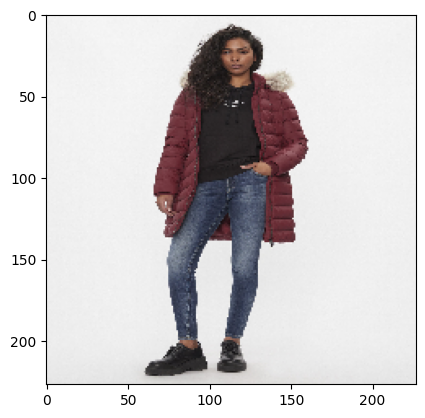

In [11]:
# now display the images
plt.imshow(X_train_images[0])
plt.show()

In [19]:
# now we will create the model
# this model will be multi-class classification model, which will predict the class of the image
# we will use the AlexNet model for this purpose
# AlexNet is a pre-trained model, which is trained on the ImageNet dataset
# we will use the pre-trained model and fine-tune it on our dataset

# import the required libraries
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.applications import AlexNet

# create the model
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11, 11), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# compile the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 72, 72, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 384)       1

In [13]:
# compile the model with the optimizer, loss function and evaluation metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train the model
history = model.fit(X_train_images, y_train, batch_size=32, epochs=10, validation_data=(X_test_images, y_test))

Epoch 1/10


2024-03-20 04:27:33.103989: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 578629632 exceeds 10% of free system memory.
2024-03-20 04:27:38.199059: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 578629632 exceeds 10% of free system memory.


1/4 [======>.......................] - ETA: 27s - loss: 13.1737 - accuracy: 0.3438

2024-03-20 04:27:40.910222: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 578629632 exceeds 10% of free system memory.
2024-03-20 04:27:45.961405: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 578629632 exceeds 10% of free system memory.


2/4 [==============>...............] - ETA: 15s - loss: 18.2833 - accuracy: 0.2969

2024-03-20 04:27:48.613261: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 578629632 exceeds 10% of free system memory.


4/4 [==============================] - 30s 7s/step - loss: 16.5469 - accuracy: 0.3097 - val_loss: 3.8929 - val_accuracy: 0.3846
Epoch 2/10
4/4 [==============================] - 29s 7s/step - loss: 3.5842 - accuracy: 0.3097 - val_loss: 1.7969 - val_accuracy: 0.3846
Epoch 3/10
4/4 [==============================] - 28s 7s/step - loss: 1.6549 - accuracy: 0.4248 - val_loss: 1.0124 - val_accuracy: 0.5385
Epoch 4/10
4/4 [==============================] - 24s 6s/step - loss: 1.2348 - accuracy: 0.5575 - val_loss: 1.1791 - val_accuracy: 0.6154
Epoch 5/10
4/4 [==============================] - 24s 6s/step - loss: 0.9944 - accuracy: 0.6018 - val_loss: 0.8339 - val_accuracy: 0.5385
Epoch 6/10
4/4 [==============================] - 27s 7s/step - loss: 0.9701 - accuracy: 0.5664 - val_loss: 0.8102 - val_accuracy: 0.6154
Epoch 7/10
4/4 [==============================] - 28s 7s/step - loss: 0.7583 - accuracy: 0.6460 - val_loss: 0.7677 - val_accuracy: 0.6154
Epoch 8/10
4/4 [============================

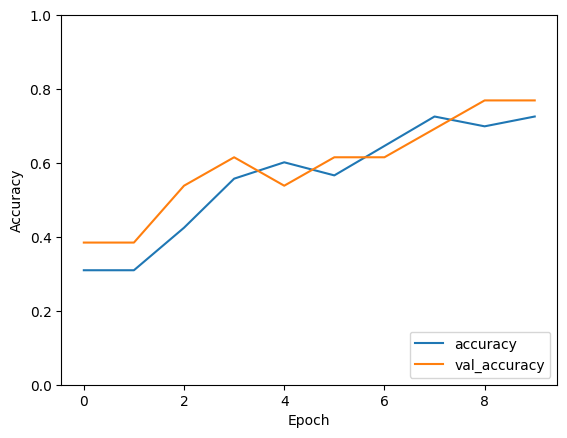

In [14]:
# plot the accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
# save this model for future use 
model.save('face_model.h5')

/home/naveedali/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# save this model in tensorflow.keras format
model.save('face_model_tf', save_format='tf')

INFO:tensorflow:Assets written to: face_model_tf/assets


INFO:tensorflow:Assets written to: face_model_tf/assets


In [21]:
# Saving model to disk
save_model(model, "best.keras")


# Save History
import numpy as np
model_history = {key: np.array(value).tolist() for key, value in history.history.items()}
import json

with open('best_history.json', 'w') as f:
    json.dump(model_history, f)


In [2]:
# import the required libraries
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import json
#from tensorflow.keras.applications import AlexN


# loading trained model from disk
loaded_model = load_model('finetuned.keras')

loaded_model.summary()


# Loading History
with open('best_history.json', 'r') as f:
    load_model_history = json.load(f)

loaded_history = {key: np.array(value) for key, value in load_model_history.items()}

2024-03-20 15:42:41.457238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 15:42:41.457288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 15:42:41.458469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 15:42:41.468779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 15:42:42.456470: W tensorflow/compiler/tf2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 72, 72, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 384)       1

In [3]:
import cv2
import numpy as np
# take a picture and test it 
pic = cv2.imread('/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/test/53_1.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic = cv2.resize(pic, (227, 227))
pic = np.array(pic)
pic = np.expand_dims(pic, axis=0)
# test the model
prediction = loaded_model.predict(pic)
print(prediction)
print(np.argmax(prediction))
print(np.max(prediction))


1/1 [==============================] - 0s 249ms/step
[[1. 0. 0.]]
0
1.0


In [4]:
# take a picture and test it 
pic = cv2.imread('/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/predicted/2/4_3.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic = cv2.resize(pic, (227, 227))
pic = np.array(pic)
pic = np.expand_dims(pic, axis=0)
# test the model
prediction = loaded_model.predict(pic)
print(prediction)
print(np.argmax(prediction))
print(np.max(prediction))


1/1 [==============================] - 0s 98ms/step
[[0. 1. 0.]]
1
1.0


In [5]:
import os
import cv2
# open the folder named manually annotated and check the number of images in it
imgfilesmanuallyannotated = os.listdir("/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/modivo_images_resized")
print(len(imgfilesmanuallyannotated))

21948


In [6]:
# store the images in a list
images = []
for imgfile in imgfilesmanuallyannotated:
    img = cv2.imread(os.path.join("/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/modivo_images_resized", imgfile))
    images.append(img)

len(images)

In [ ]:
# now we will use all these pictures for prediction and store the results in different folders based on the prediction
# if the prediction gives 0, store the image in class 0 folder
# if the prediction gives 1, store the image in class 1 folder
# if the prediction gives 2, store the image in class 2 folder

for images in imgfilesmanuallyannotated:
    pic = cv2.imread(os.path.join("/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/modivo_images_resized", images))
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic, (227, 227))
    pic = np.array(pic)
    pic = np.expand_dims(pic, axis=0)
    # test the model
    prediction = loaded_model.predict(pic)
    print(prediction)
    print(np.argmax(prediction))
    print(np.max(prediction))
    if np.argmax(prediction) == 0:
        # copy the image in class 0 folder

In [15]:
import shutil

In [ ]:
# test an image from the manually annotated folder
pic = cv2.imread('/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/modivo_images_resized/367_1.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic = cv2.resize(pic, (227, 227))
pic = np.array(pic)
pic = np.expand_dims(pic, axis=0)
# test the model    
prediction = loaded_model.predict(pic)
print(prediction)
print(np.argmax(prediction))

# if the prediction is 0, then move the image to the sorted_non_models folder
# if the prediction is 1, then move the image to the sorted_models folder
import shutil
if np.argmax(prediction) == 0:
    shutil.copy('/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/modivo_images_resized/367_1.jpg', "/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/sorted_non_models")
elif np.argmax(prediction) == 1:
    shutil.copy('/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/modivo_images_resized/367_1.jpg', "/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/sorted_models")
else:
    shutil.copy('/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/modivo_images_resized/367_1.jpg', "/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/sorted_trash")